# Covid-19 EDA

## Dataset Understanding

In [1]:
# !pip install folium
# !pip install plotly

In [2]:
# imports
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import random
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

In [3]:
# color palette
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'

## Dataset Preparation

In [4]:
import plotly as py
py.offline.init_notebook_mode(connected=True)

In [5]:
df = pd.read_csv('covid_19_data_cleaned.csv', parse_dates=['Date'])
country_daywise = pd.read_csv('country_daywise.csv', parse_dates=['Date'])
countrywise = pd.read_csv('countrywise.csv')
daywise = pd.read_csv('daywise.csv', parse_dates=['Date'])

In [6]:
df['Province/State'] = df['Province/State'].fillna("")
df.head()

Date Province/State      Country   Lat  Long  Confirmed  Recovered  \
0 2020-01-22                 Afghanistan  33.0  65.0          0          0   
1 2020-01-23                 Afghanistan  33.0  65.0          0          0   
2 2020-01-24                 Afghanistan  33.0  65.0          0          0   
3 2020-01-25                 Afghanistan  33.0  65.0          0          0   
4 2020-01-26                 Afghanistan  33.0  65.0          0          0   

   Deaths  Active  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

In [7]:
country_daywise.head()

Date      Country  Confirmed  Deaths  Recovered  Active  New Cases  \
0 2020-01-22  Afghanistan          0       0          0       0          0   
1 2020-01-22      Albania          0       0          0       0          0   
2 2020-01-22      Algeria          0       0          0       0          0   
3 2020-01-22      Andorra          0       0          0       0          0   
4 2020-01-22       Angola          0       0          0       0          0   

   New Deaths  New Recovered  
0           0              0  
1           0              0  
2           0              0  
3           0              0  
4           0              0

In [8]:
countrywise.head()

Country  Confirmed  Deaths  Recovered  Active  New Cases  \
0  Afghanistan       4033     115        502    3416        255   
1      Albania        856      31        627     198          6   
2      Algeria       5558     494       2546    2518        189   
3      Andorra        754      48        545     161          2   
4       Angola         43       2         13      28          0   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                2.85                  12.45                   22.91   
1                3.62                  73.25                    4.94   
2                8.89                  45.81                   19.40   
3                6.37                  72.28                    8.81   
4                4.65                  30.23                   15.38   

   Population  Cases / Million People  Confirmed last week  1 week change  \
0    38928341                   104.0                 2469           1564   
1     2877800                   297.0                  789             67   
2    43851043                   127.0                 4295           1263   
3       77265                  9759.0                  747              7   
4    32866268                     1.0                   35              8   

   1 week % increase  
0              63.35  
1               8.49  
2              29.41  
3               0.94  
4              22.86

In [9]:
daywise.head()

Date  Confirmed  Deaths  Recovered  Active  New Cases  \
0 2020-01-22        555      17         28     510          0   
1 2020-01-23        654      18         30     606         99   
2 2020-01-24        941      26         36     879        287   
3 2020-01-25       1434      42         39    1353        493   
4 2020-01-26       2118      56         52    2010        684   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                3.06                   5.05                   60.71   
1                2.75                   4.59                   60.00   
2                2.76                   3.83                   72.22   
3                2.93                   2.72                  107.69   
4                2.64                   2.46                  107.69   

   No. of Countries  
0                 6  
1                 8  
2                 9  
3                11  
4                13

In [10]:
df.groupby('Country')[['Confirmed', 'Recovered', 'Deaths']].sum()

Confirmed  Recovered  Deaths
Country                                         
Afghanistan             56854       6657    1733
Albania                 25233      13241    1098
Algeria                117840      43893   13772
Andorra                 28643      10248    1367
Angola                    978        231      84
...                       ...        ...     ...
West Bank and Gaza      13243       3179      75
Western Sahara            196         85       0
Yemen                     210         16      38
Zambia                   3293       1624      96
Zimbabwe                  984         95     131

[187 rows x 3 columns]

In [11]:
confirmed = df.groupby('Date').Confirmed.sum().reset_index()
recovered = df.groupby('Date').Recovered.sum().reset_index()
deaths = df.groupby('Date').Deaths.sum().reset_index()


In [12]:
df.isnull().sum()

Date              0
Province/State    0
Country           0
Lat               0
Long              0
Confirmed         0
Recovered         0
Deaths            0
Active            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29430 entries, 0 to 29429
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            29430 non-null  datetime64[ns]
 1   Province/State  29430 non-null  object        
 2   Country         29430 non-null  object        
 3   Lat             29430 non-null  float64       
 4   Long            29430 non-null  float64       
 5   Confirmed       29430 non-null  int64         
 6   Recovered       29430 non-null  int64         
 7   Deaths          29430 non-null  int64         
 8   Active          29430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 2.0+ MB


In [14]:
df.query('Country == "US"')

Date Province/State Country      Lat     Long  Confirmed  \
24525 2020-01-22                     US  37.0902 -95.7129          1   
24526 2020-01-23                     US  37.0902 -95.7129          1   
24527 2020-01-24                     US  37.0902 -95.7129          2   
24528 2020-01-25                     US  37.0902 -95.7129          2   
24529 2020-01-26                     US  37.0902 -95.7129          5   
...          ...            ...     ...      ...      ...        ...   
24629 2020-05-05                     US  37.0902 -95.7129    1204351   
24630 2020-05-06                     US  37.0902 -95.7129    1229331   
24631 2020-05-07                     US  37.0902 -95.7129    1257023   
24632 2020-05-08                     US  37.0902 -95.7129    1283929   
24633 2020-05-09                     US  37.0902 -95.7129    1309550   

       Recovered  Deaths   Active  
24525          0       0        1  
24526          0       0        1  
24527          0       0        2  
24528          0       0        2  
24529          0       0        5  
...          ...     ...      ...  
24629     189791   71064   943496  
24630     189910   73455   965966  
24631     195036   75662   986325  
24632     198993   77180  1007756  
24633     212534   78795  1018221  

[109 rows x 9 columns]

## Worldwide Total confirmed, Recovered, and Deaths

In [15]:
confirmed.tail()

Date  Confirmed
104 2020-05-05    3662691
105 2020-05-06    3756069
106 2020-05-07    3845718
107 2020-05-08    3938064
108 2020-05-09    4024009

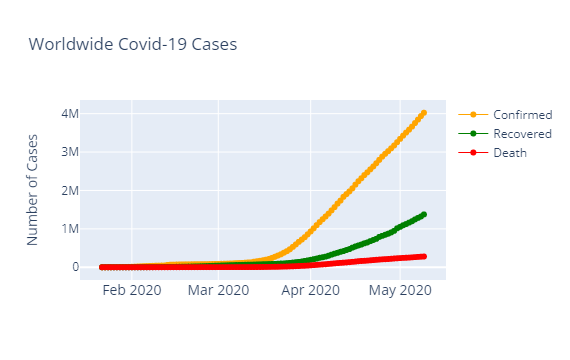

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'],
             mode='lines+markers', name='Confirmed',
                         line=dict(color='orange',width=1)))

fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'],
             mode='lines+markers', name='Recovered',
                         line=dict(color='green',width=1)))

fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'],
             mode='lines+markers', name='Death',
                         line=dict(color='Red',width=1)))

fig.update_layout(title='Worldwide Covid-19 Cases', 
                  xaxis_tickfont_size=14,
                 yaxis=dict(title='Number of Cases'))

fig.show()

## Cases Density Animation on World Map

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29430 entries, 0 to 29429
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            29430 non-null  datetime64[ns]
 1   Province/State  29430 non-null  object        
 2   Country         29430 non-null  object        
 3   Lat             29430 non-null  float64       
 4   Long            29430 non-null  float64       
 5   Confirmed       29430 non-null  int64         
 6   Recovered       29430 non-null  int64         
 7   Deaths          29430 non-null  int64         
 8   Active          29430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 2.0+ MB


In [18]:
df['Date']

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
29425   2020-05-05
29426   2020-05-06
29427   2020-05-07
29428   2020-05-08
29429   2020-05-09
Name: Date, Length: 29430, dtype: datetime64[ns]

In [19]:
df['Date'] = df['Date'].astype('str')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29430 entries, 0 to 29429
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            29430 non-null  object 
 1   Province/State  29430 non-null  object 
 2   Country         29430 non-null  object 
 3   Lat             29430 non-null  float64
 4   Long            29430 non-null  float64
 5   Confirmed       29430 non-null  int64  
 6   Recovered       29430 non-null  int64  
 7   Deaths          29430 non-null  int64  
 8   Active          29430 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 2.0+ MB


In [21]:
# fig = px.density_mapbox(df, lat='Lat', lon='Long', hover_name='Country',
#                        hover_data=['Confirmed', "Recovered", 'Deaths'],
#                        animation_frame='Date', color_continuous_scale='Portland',
#                        radius=7, zoom=0, height=700)
# fig.update_layout(title='Worldwide Covid-19 Cases with Time Lapse')
# fig.update_layout(mapbox_style='open-street-map', mapbox_center_lon=0)
# fig.show()

## Total Cases on Ships

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29430 entries, 0 to 29429
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            29430 non-null  datetime64[ns]
 1   Province/State  29430 non-null  object        
 2   Country         29430 non-null  object        
 3   Lat             29430 non-null  float64       
 4   Long            29430 non-null  float64       
 5   Confirmed       29430 non-null  int64         
 6   Recovered       29430 non-null  int64         
 7   Deaths          29430 non-null  int64         
 8   Active          29430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 2.0+ MB


In [24]:
# Ships

ship_rows = df['Province/State'].str.contains('Grand Princess') | \
            df['Province/State'].str.contains('Diamond Princess') | \
            df['Country'].str.contains('Grand Princess') | \
            df['Country'].str.contains('Diamond Princess') | \
             df['Country'].str.contains('MS Zaandam')

ship = df[ship_rows]
df = df[~ship_rows]

In [25]:
# latest cases on ship

ship_latest = ship[ship['Date'] == max(ship['Date'])]
ship_latest

Date    Province/State           Country      Lat      Long  \
4141  2020-05-09    Grand Princess            Canada  37.6489 -122.6655   
9700  2020-05-09                    Diamond Princess   0.0000    0.0000   
25287 2020-05-09  Diamond Princess            Canada   0.0000    0.0000   
27576 2020-05-09                          MS Zaandam   0.0000    0.0000   

       Confirmed  Recovered  Deaths  Active  
4141          13          0       0      13  
9700         712        645      13      54  
25287          1          0       1       0  
27576          9          0       2       7

In [26]:
ship_latest.style.background_gradient(cmap='Pastel1_r')

## Cases over the time with area plot

In [27]:
temp = df.groupby('Date')['Confirmed', 'Deaths', 
                   'Recovered','Active'].sum().reset_index()
max_temp = temp[temp['Date'] == max(temp['Date'])].reset_index(drop=True)
max_temp

Date  Confirmed  Deaths  Recovered   Active
0 2020-05-09    4023274  279295    1374979  2369000

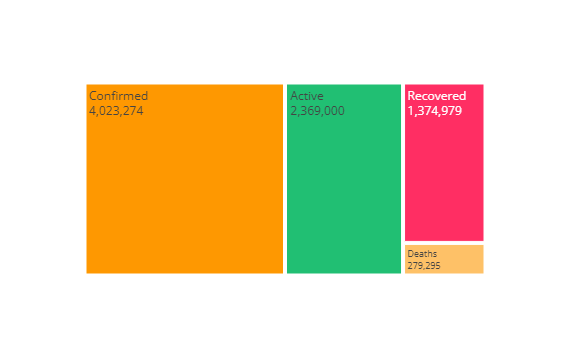

In [28]:
tm = max_temp.melt(id_vars='Date', value_vars=['Active','Deaths',
                                          'Recovered', 'Confirmed' ])
fig = px.treemap(tm, path=['variable'], values='value',
                 height=250, width=800,
                 color_discrete_sequence=[act, rec, dth])

fig.data[0].textinfo = 'label+text+value'
fig.show()

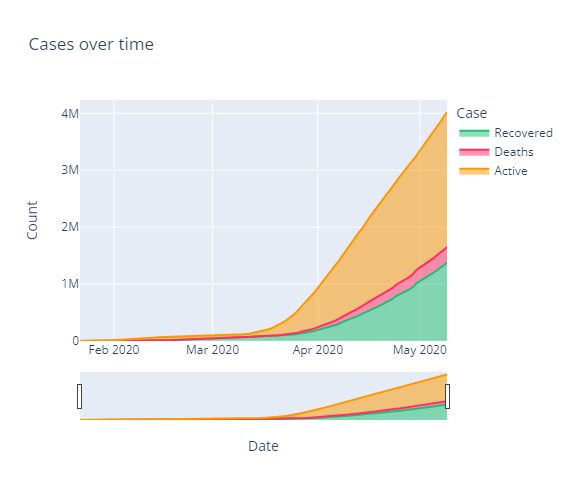

In [29]:
tm = temp.melt(id_vars='Date', value_vars=['Recovered','Deaths','Active'],
              var_name='Case', value_name='Count')

fig = px.area(tm, x='Date', y='Count', color='Case',
              height=500, title='Cases over time',
             color_discrete_sequence=[rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## Folium Map

In [30]:
temp = df[df['Date'] == max(df['Date'])]

m = folium.Map(location=[0,0], tiles='cartodbpositron',
               min_zoom=1,max_zoom=4, zoom_start=1)

for i in range(0, len(temp)):
    folium.Circle(location=[temp.iloc[i]['Lat'],temp.iloc[i]['Long']],
                 color='crimson', fill='crimson',
                  tooltip='<li><bold> Country: '+str(temp.iloc[i]['Country'])+
                 '<li><bold> Province: '+str(temp.iloc[i]['Province/State'])+
                 '<li><bold> Confirmed: '+str(temp.iloc[i]['Confirmed'])+
                 '<li><bold> Deaths: '+str(temp.iloc[i]['Deaths']),
                 radius=int(temp.iloc[i]['Confirmed'])**0.5).add_to(m)

m

## Confirmed Cases with Cholorpleth Map

In [31]:
country_daywise.head()

Date      Country  Confirmed  Deaths  Recovered  Active  New Cases  \
0 2020-01-22  Afghanistan          0       0          0       0          0   
1 2020-01-22      Albania          0       0          0       0          0   
2 2020-01-22      Algeria          0       0          0       0          0   
3 2020-01-22      Andorra          0       0          0       0          0   
4 2020-01-22       Angola          0       0          0       0          0   

   New Deaths  New Recovered  
0           0              0  
1           0              0  
2           0              0  
3           0              0  
4           0              0

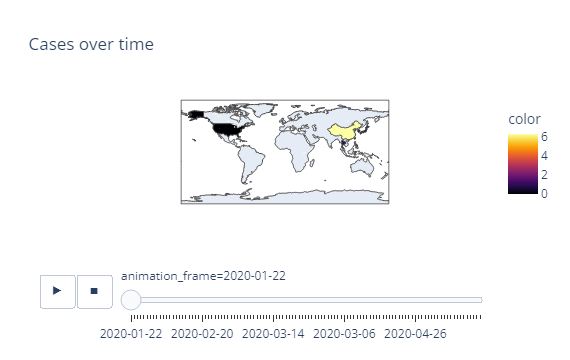

In [32]:
fig = px.choropleth(country_daywise, locations='Country',
                    locationmode='country names', 
                    color=np.log(country_daywise['Confirmed']),
                    hover_name = 'Country', 
                    animation_frame=country_daywise['Date'].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', 
                    color_continuous_scale=px.colors.sequential.Inferno)

fig.update(layout_coloraxis_showscale=True)
fig.show()

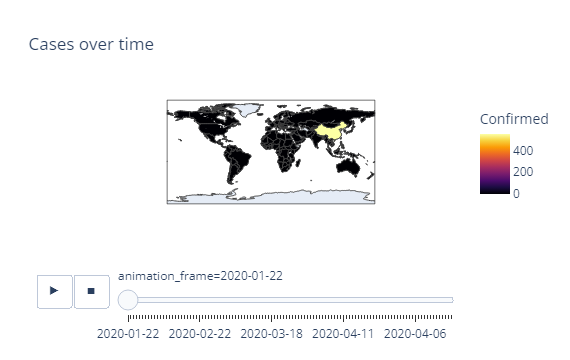

In [33]:
fig = px.choropleth(country_daywise, locations='Country',
                    locationmode='country names', 
                    color=country_daywise['Confirmed'],
                    hover_name = 'Country', 
                    animation_frame=country_daywise['Date'].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', 
                    color_continuous_scale=px.colors.sequential.Inferno)

fig.update(layout_coloraxis_showscale=True)
fig.show()

## Confirmed and Death Cases with Bar Plot

In [34]:
daywise.head()

Date  Confirmed  Deaths  Recovered  Active  New Cases  \
0 2020-01-22        555      17         28     510          0   
1 2020-01-23        654      18         30     606         99   
2 2020-01-24        941      26         36     879        287   
3 2020-01-25       1434      42         39    1353        493   
4 2020-01-26       2118      56         52    2010        684   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                3.06                   5.05                   60.71   
1                2.75                   4.59                   60.00   
2                2.76                   3.83                   72.22   
3                2.93                   2.72                  107.69   
4                2.64                   2.46                  107.69   

   No. of Countries  
0                 6  
1                 8  
2                 9  
3                11  
4                13

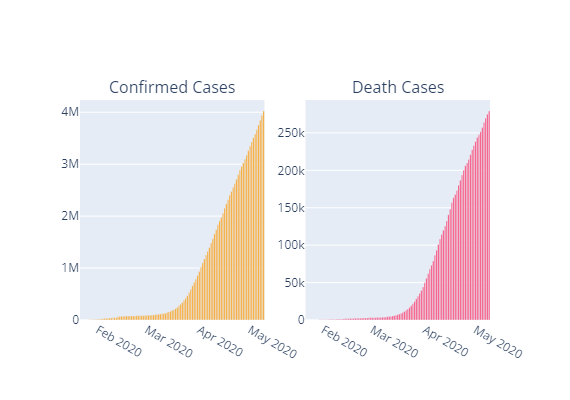

In [35]:
fig_c = px.bar(daywise, x='Date', y='Confirmed', 
               color_discrete_sequence=[act])

fig_d = px.bar(daywise, x='Date', y='Deaths', 
               color_discrete_sequence=[dth])

fig = make_subplots(rows=1, cols=2, shared_xaxes=False, 
                  horizontal_spacing=0.1, 
                  subplot_titles=('Confirmed Cases', 'Death Cases'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.update_layout(height=400)

fig.show()

## Confirmed and Death Cases with Static Colormap

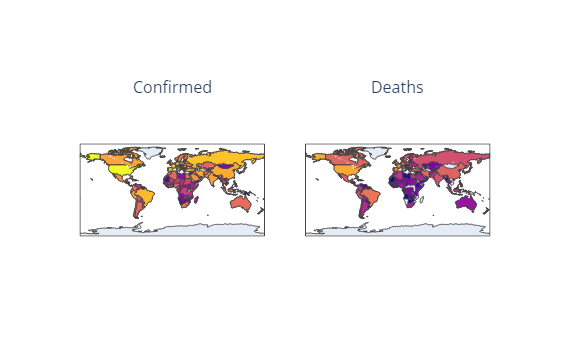

In [36]:
fig_c = px.choropleth(countrywise, locations='Country', 
                     locationmode='country names', 
                     color=np.log(countrywise['Confirmed']), 
                     hover_name='Country', hover_data=['Confirmed'])

gt_zero = countrywise[countrywise['Deaths']>0]

fig_d = px.choropleth(gt_zero, locations='Country', 
                     locationmode='country names', 
                     color=np.log(gt_zero['Deaths']), 
                     hover_name='Country', hover_data=['Deaths'])

fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=['Confirmed', 'Deaths'],
                    specs=[[{'type':'choropleth'}, {'type':'choropleth'}]])

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.update(layout_coloraxis_showscale=False)

fig.show()

## Deaths per 100 Cases

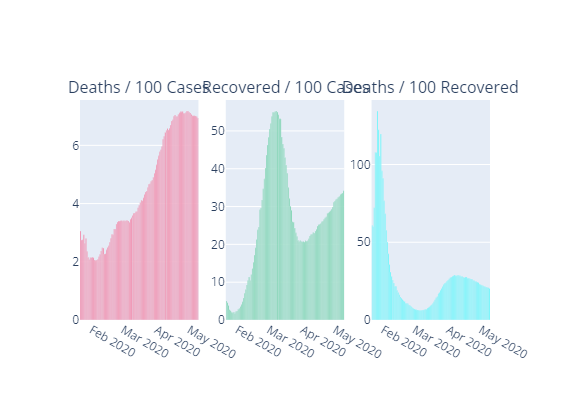

In [37]:
fig1 = px.bar(daywise, x='Date', y='Deaths / 100 Cases',
              color_discrete_sequence=[dth])

fig2 = px.bar(daywise, x='Date', y='Recovered / 100 Cases',
              color_discrete_sequence=[rec])

fig3 = px.bar(daywise, x='Date', y='Deaths / 100 Recovered',
              color_discrete_sequence=['aqua'])

fig = make_subplots(rows=1, cols=3, shared_xaxes=False, 
                   subplot_titles=('Deaths / 100 Cases',
                                  'Recovered / 100 Cases',
                                  'Deaths / 100 Recovered'))

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=1, col=3)

fig.update_layout(height=400)
fig.show()

In [38]:
daywise.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New Cases',
       'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'No. of Countries'],
      dtype='object')

## New Cases and Number of Countries

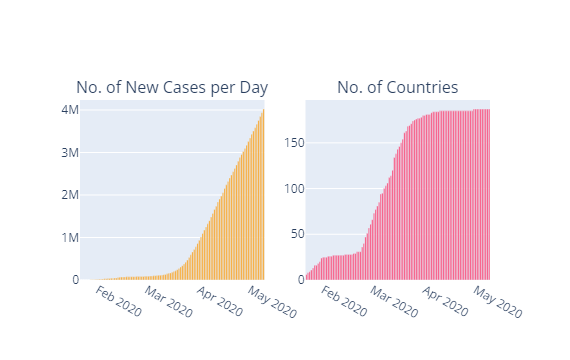

In [39]:
fig_c = px.bar(daywise, x='Date', y='Confirmed', 
               color_discrete_sequence=[act])

fig_d = px.bar(daywise, x='Date', y='No. of Countries', 
               color_discrete_sequence=[dth]) 

fig = make_subplots(rows=1, cols=2, shared_xaxes=False,
                    horizontal_spacing=0.1,
                   subplot_titles=('No. of New Cases per Day',
                                   'No. of Countries'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.show()


## Top 15 Countries Case Analysis

In [40]:
countrywise.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New Cases',
       'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Population', 'Cases / Million People', 'Confirmed last week',
       '1 week change', '1 week % increase'],
      dtype='object')

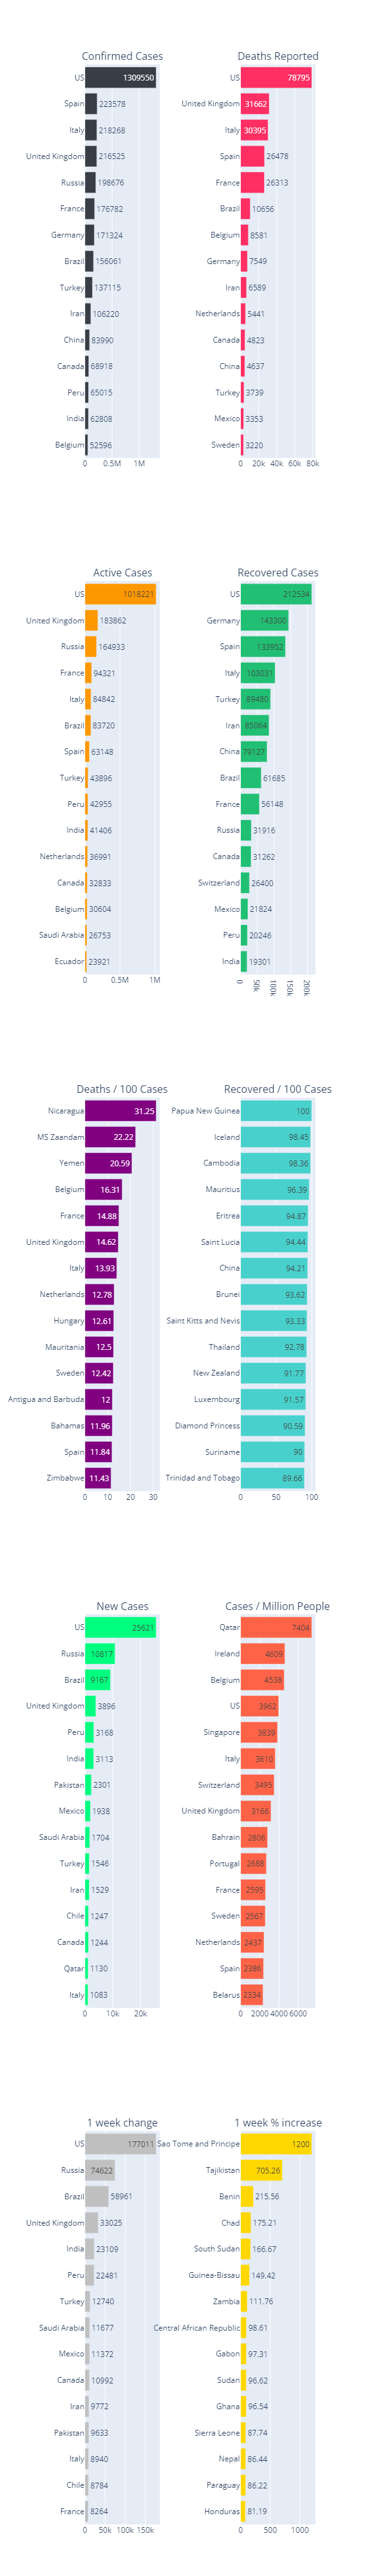

In [41]:
top = 15

def top_15(column_name, top=15):
    if column_name in countrywise.columns:
        return countrywise.sort_values(column_name).tail(top)

# Confirmed Cases
fig_c = px.bar(top_15('Confirmed'), x='Confirmed', y='Country',
               text='Confirmed', orientation='h',
               color_discrete_sequence=[cnf])

# Deaths Reported
fig_d = px.bar(top_15('Deaths'), x='Deaths', y='Country',
               text='Deaths', orientation='h',
               color_discrete_sequence=[dth])


# Active Cases
fig_a = px.bar(top_15('Active'), x='Active', y='Country',
               text='Active', orientation='h',
               color_discrete_sequence=[act])


# Recovered Cases
fig_r = px.bar(top_15('Recovered'), x='Recovered', y='Country',
               text='Recovered', orientation='h',
               color_discrete_sequence=[rec])


# Death per 100 Cases
fig_dc =  px.bar(top_15('Deaths / 100 Cases'),
                        x='Deaths / 100 Cases', y='Country',
               text='Deaths / 100 Cases', orientation='h',
               color_discrete_sequence=['#800080'])

# Recovery per 100 Cases
fig_rc = px.bar(top_15('Recovered / 100 Cases'),
                        x='Recovered / 100 Cases', y='Country',
               text='Recovered / 100 Cases', orientation='h',
               color_discrete_sequence=['#48d1cc'])

# New Cases
fig_nc = px.bar(top_15('New Cases'),
                        x='New Cases', y='Country',
               text='New Cases', orientation='h',
               color_discrete_sequence=['#00ff7f'])


# Cases / Million People
temp = countrywise[countrywise['Population']>1000000]

fig_p = px.bar(temp.sort_values('Cases / Million People').tail(top),
                        x='Cases / Million People', y='Country',
               text='Cases / Million People', orientation='h',
               color_discrete_sequence=['#ff6347'])


# 1 Week change
fig_wk = px.bar(top_15('1 week change'),
                        x='1 week change', y='Country',
               text='1 week change', orientation='h',
               color_discrete_sequence=['#c0c0c0'])


# 1 week % increase
temp = countrywise[countrywise['Confirmed']>100]
fig_wk_pct = px.bar(temp.sort_values('1 week % increase').tail(top),
                        x='1 week % increase', y='Country',
               text='1 week % increase', orientation='h',
               color_discrete_sequence=['#ffd700'])



titles = ('Confirmed Cases', 'Deaths Reported', 
          'Active Cases', 'Recovered Cases',
         'Deaths / 100 Cases', 'Recovered / 100 Cases',
         'New Cases', 'Cases / Million People',
         '1 week change', '1 week % increase')

fig = make_subplots(rows=5, cols=2, shared_xaxes=False,
                   horizontal_spacing=0.35, 
                   vertical_spacing=0.05,
                   subplot_titles=titles)



fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)


fig.add_trace(fig_a['data'][0], row=2, col=1)
fig.add_trace(fig_r['data'][0], row=2, col=2)


fig.add_trace(fig_dc['data'][0], row=3, col=1)
fig.add_trace(fig_rc['data'][0], row=3, col=2)


fig.add_trace(fig_nc['data'][0], row=4, col=1)
fig.add_trace(fig_p['data'][0], row=4, col=2)


fig.add_trace(fig_wk['data'][0], row=5, col=1)
fig.add_trace(fig_wk_pct['data'][0], row=5, col=2)


fig.update_layout(height=4000)
fig.show()

## Save Static Plots

In [42]:
import os
if not os.path.exists('images'):
    os.mkdir('images')

In [43]:
fig.write_image('images/fig.png')

In [44]:
fig.write_image('images/fig.jpeg')

In [45]:
fig.write_image('images/fig.pdf')

## Scatter plot for Deaths vs Confirmed Cases

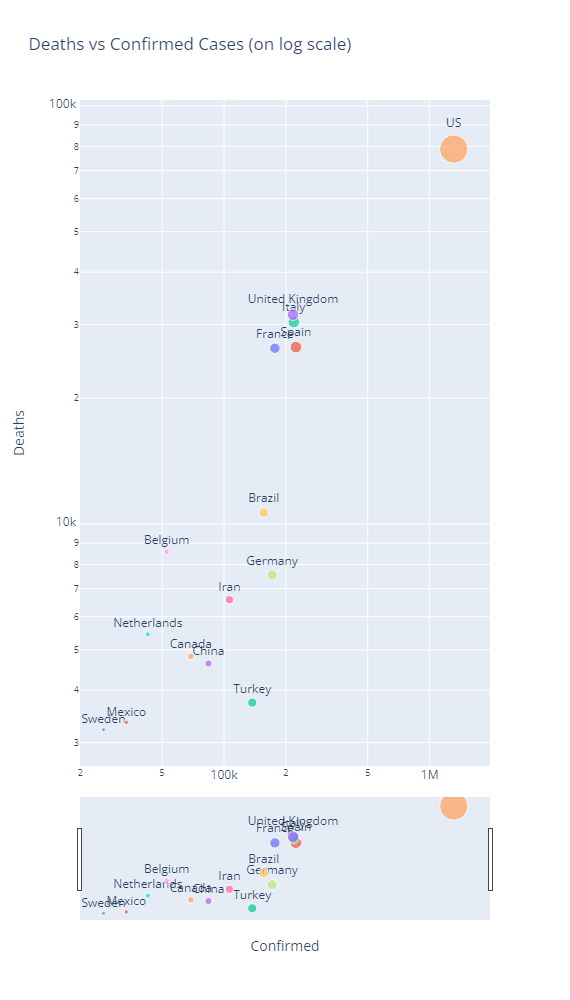

In [46]:
fig = px.scatter(top_15('Deaths'),
                 x='Confirmed',y='Deaths', 
                 color='Country', size='Confirmed',
                 height=1000, text='Country', log_x= True,
                 log_y=True, 
                 title='Deaths vs Confirmed Cases (on log scale)')

fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## Confirmed, Deaths, New Cases vs Country and Date

### Bar plot

In [47]:
# fig = px.bar(country_daywise, x='Date', y='Confirmed', 
#              color='Country', height=600, title='Confirmed',
#              color_discrete_sequence=px.colors.cyclical.mygbm)
# fig.show()

In [48]:
# fig = px.bar(country_daywise, x='Date', y='Deaths', 
#              color='Country', height=600, title='Deaths',
#              color_discrete_sequence=px.colors.cyclical.mygbm)
# fig.show()

In [49]:
# fig = px.bar(country_daywise, x='Date', y='Recovered', 
#              color='Country', height=600, title='Recovered',
#              color_discrete_sequence=px.colors.cyclical.mygbm)
# fig.show()

In [50]:
# fig = px.bar(country_daywise, x='Date', y='New Cases', 
#              color='Country', height=600, title='New Cases',
#              color_discrete_sequence=px.colors.cyclical.mygbm)
# fig.show()

### Line Plot

In [51]:
# fig = px.line(country_daywise, x='Date',y='Confirmed',
#               color='Country', height=600,
#               title='Confirmed', 
#               color_discrete_sequence=px.colors.cyclical.mygbm)
# fig.show()

In [52]:
# fig = px.line(country_daywise, x='Date',y='Deaths',
#               color='Country', height=600,
#               title='Deaths', 
#               color_discrete_sequence=px.colors.cyclical.mygbm)
# fig.show()

In [53]:
# fig = px.line(country_daywise, x='Date',y='Recovered',
#               color='Country', height=600,
#               title='Recovered', 
#               color_discrete_sequence=px.colors.cyclical.mygbm)
# fig.show()

In [54]:
# fig = px.line(country_daywise, x='Date',y='New Cases',
#               color='Country', height=600,
#               title='New Cases', 
#               color_discrete_sequence=px.colors.cyclical.mygbm)
# fig.show()

## Growth Rate

In [55]:
def growth_rate(cases):
    if type(cases) == int and cases > 0:
        gt_100 = country_daywise[country_daywise.Confirmed >=cases]['Country'].unique()
        temp = df[df['Country'].isin(gt_100)]

        temp.groupby(['Country', 'Date'])['Confirmed'].sum().reset_index()
        temp = temp[temp['Confirmed']>cases]


        min_date = temp.groupby('Country')['Date'].min().reset_index()
        min_date.columns = ['Country', 'Minimum Date']

        from_100th_case = pd.merge(temp, min_date, on='Country')
        from_100th_case['N days'] = (from_100th_case['Date'] - from_100th_case['Minimum Date']).dt.days

        fig = px.line(from_100th_case, x='N days', y='Confirmed', 
                      color='Country', height=600,
                      title=f'N days from first {cases} cases')

        fig.show()

#### Growth after first 100 cases

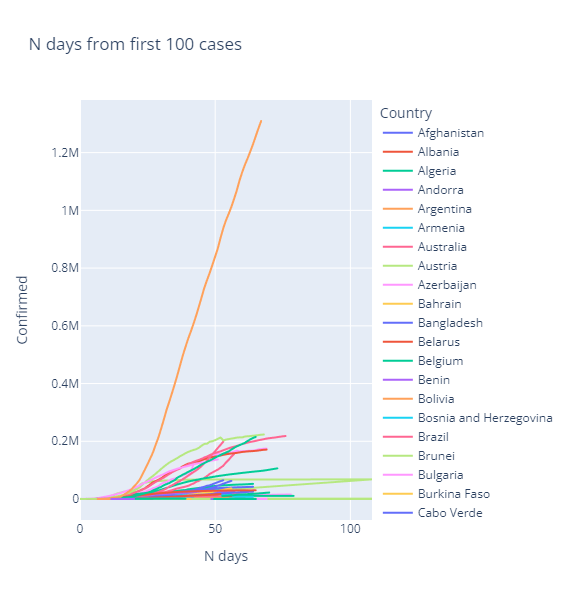

In [56]:
growth_rate(100)

#### Growth after first 1000 cases

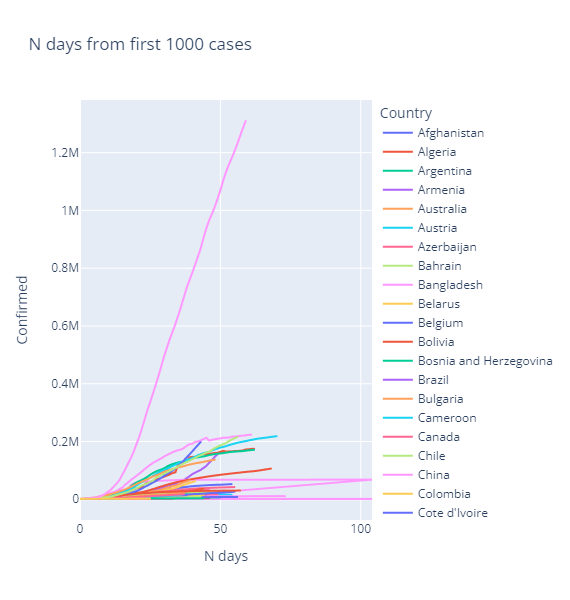

In [57]:
growth_rate(1000)

#### Growth after first 10000 cases

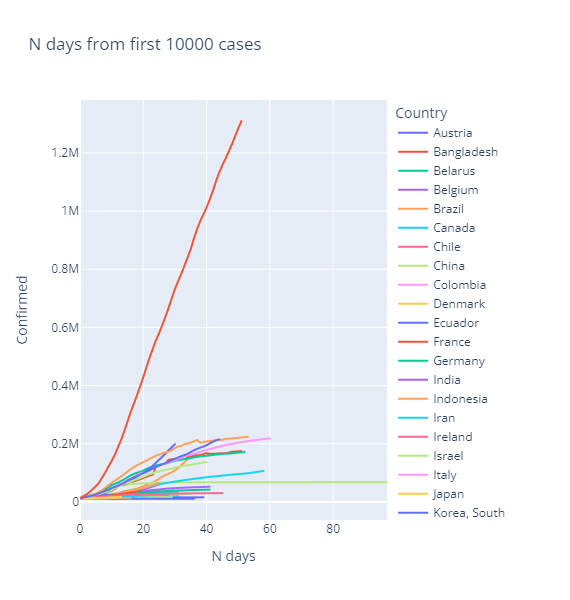

In [58]:
growth_rate(10000)

#### Growth after first 1 lakh cases

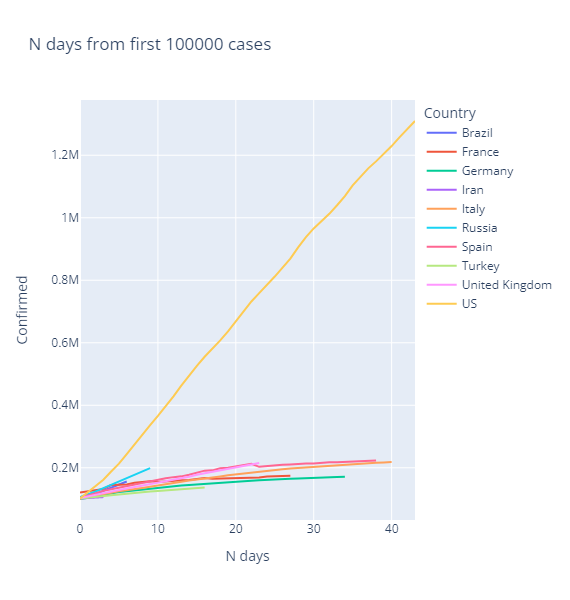

In [59]:
growth_rate(100000)

## Tree map Analysis

### Confirmed Cases

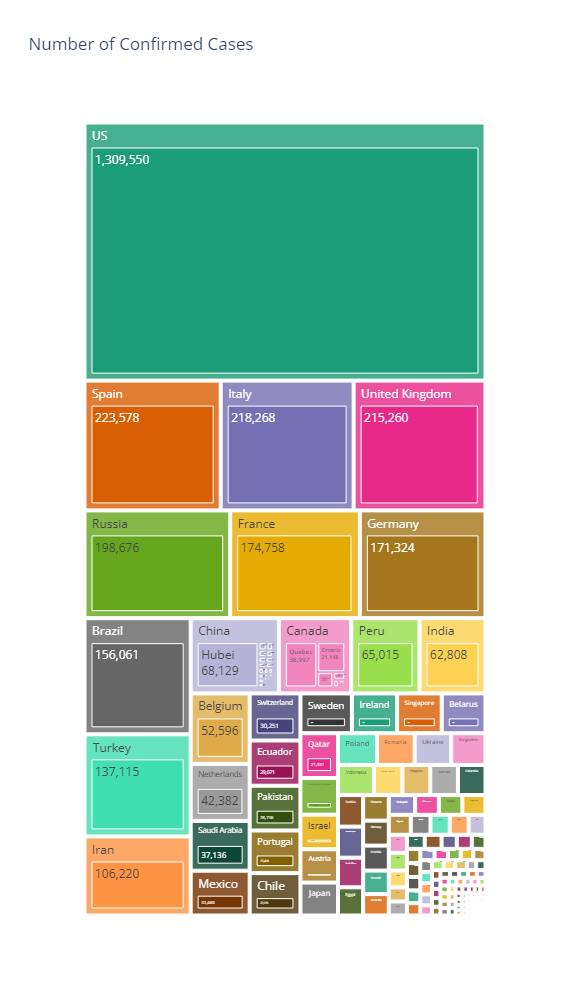

In [60]:
full_latest = df[df['Date'] == max(df['Date'])]

tree_input = full_latest.sort_values('Confirmed', 
                        ascending=False).reset_index(drop=True)


fig = px.treemap(tree_input, path=['Country', 'Province/State'],
                 values='Confirmed', height=1000,
                 title=("Number of Confirmed Cases"),
                 color_discrete_sequence=px.colors.qualitative.Dark2)

fig.data[0].textinfo = 'label+text+value'

fig.show()

### Death Cases

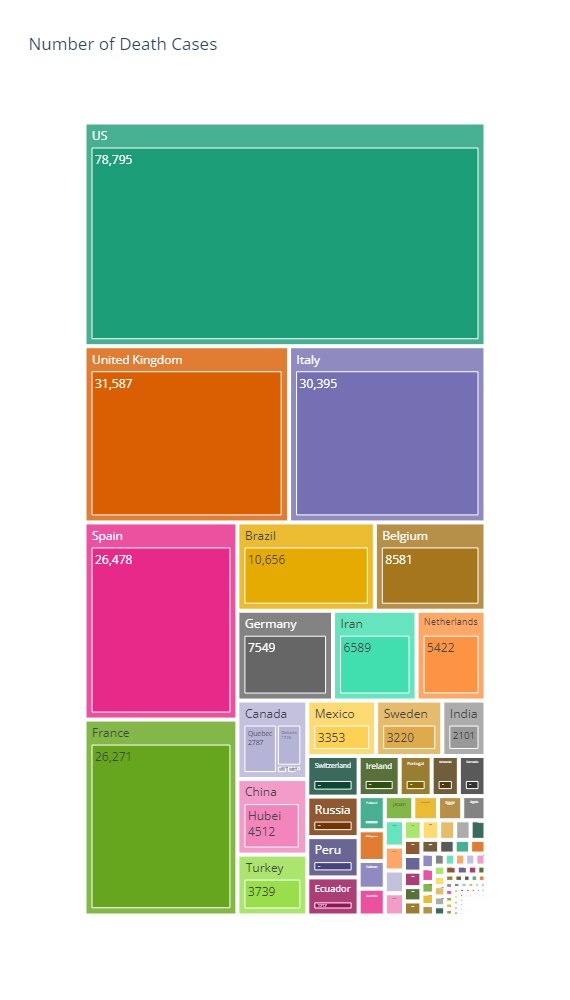

In [61]:
full_latest = df[df['Date'] == max(df['Date'])]

tree_input = full_latest.sort_values('Deaths', 
                        ascending=False).reset_index(drop=True)


fig = px.treemap(tree_input, path=['Country', 'Province/State'],
                 values='Deaths', height=1000,
                 title=("Number of Death Cases"),
                 color_discrete_sequence=px.colors.qualitative.Dark2)

fig.data[0].textinfo = 'label+text+value'

fig.show()

## First and Last Case Report Time

In [142]:
# first_date = df[df.Confirmed > 0]
# first_date = first_date.groupby(['Country'])['Date'].agg(['min']).reset_index()

# last_date = df.groupby(['Country','Date'])\
#             ['Confirmed', 'Deaths', 'Recovered'].sum().diff().reset_index()

# mask = (last_date['Country'] != last_date['Country'].shift(1))

# last_date.loc[mask, 'Confirmed'] = np.nan
# last_date.loc[mask, 'Deaths'] = np.nan
# last_date.loc[mask, 'Recovered'] = np.nan

# last_date = last_date[last_date['Confirmed'] > 0]
# last_date = last_date.groupby('Country')['Date'].agg(['max']).reset_index()

# first_last = pd.concat([first_date, last_date['max']], axis=1)
# first_last['max'] = first_last['max'] + timedelta(days=1)


# first_last['Days'] = first_last['max'] - first_last['min']
# first_last['Task'] = first_last['Country']


# first_last.columns = ['Country', 'Start', 'Last', 'Days', 'Task']

# first_last = first_last.sort_values('Days')

# colors = ['#'+''.join([random.choice('0123456789ABCDEF')
#                        for j in range(6)]) 
#                        for i in range(len(first_last))]


# fig = ff.create_gantt(first_last, index_col='Country', colors=colors, 
#                show_colorbar=False, bar_width=0.2,
#                showgrid_x=True, showgrid_y=True, height=2500)
# fig.show()

## Confirmed Cases Country and Day wise

In [146]:
country_daywise.head()

Date      Country  Confirmed  Deaths  Recovered  Active  New Cases  \
0 2020-01-22  Afghanistan          0       0          0       0          0   
1 2020-01-22      Albania          0       0          0       0          0   
2 2020-01-22      Algeria          0       0          0       0          0   
3 2020-01-22      Andorra          0       0          0       0          0   
4 2020-01-22       Angola          0       0          0       0          0   

   New Deaths  New Recovered  
0           0              0  
1           0              0  
2           0              0  
3           0              0  
4           0              0

In [156]:
# temp = country_daywise.groupby(['Country', 'Date'])\
#        ['Confirmed'].sum().reset_index()

# gt_10000 = country_daywise[country_daywise.Confirmed >=10000]\
#            ['Country'].unique()

# temp = temp[temp['Country'].isin(gt_10000)]
# countries = temp['Country'].unique()

# ncols = 3
# nrows = math.ceil(len(countries)/ncols)

# fig = make_subplots(rows=nrows, cols=ncols, shared_xaxes=False,
#                    subplot_titles=countries)

# for index, country in enumerate(countries):
#     row = int((index/ncols)+1)
#     col = int((index%ncols)+1)
#     fig.add_trace(go.Bar(x=temp['Date'], 
#                          y=temp.loc[temp['Country']==country, 'Confirmed'],
#                         name=country), row=row, col=col)

# fig.update_layout(height=4000, 
#                   title_text='Confirmed Cases in each country')
# fig.update_layout(showlegend=False)

## Covid-19 vs Other Similar Epidemics

In [159]:
full_latest

Date Province/State      Country        Lat        Long  \
108   2020-05-09                 Afghanistan  33.000000   65.000000   
217   2020-05-09                     Albania  41.153300   20.168300   
326   2020-05-09                     Algeria  28.033900    1.659600   
435   2020-05-09                     Andorra  42.506300    1.521800   
544   2020-05-09                      Angola -11.202700   17.873900   
...          ...            ...          ...        ...         ...   
28993 2020-05-09                  Tajikistan  38.861034   71.276093   
29102 2020-05-09                      Canada  56.130400 -106.346800   
29211 2020-05-09                  Mozambique -18.665700   35.529600   
29320 2020-05-09                       Syria  34.802100   38.996800   
29429 2020-05-09                 Timor-Leste  -8.874200  125.727500   

       Confirmed  Recovered  Deaths  Active  
108         4033        502     115    3416  
217          856        627      31     198  
326         5558       2546     494    2518  
435          754        545      48     161  
544           43         13       2      28  
...          ...        ...     ...     ...  
28993        612          0      20     592  
29102          0      31262       0  -31262  
29211          0         34       0     -34  
29320          0         29       0     -29  
29429          0         21       0     -21  

[266 rows x 9 columns]

In [160]:
epidemics = pd.DataFrame({
    'epidemic':['COVID-19', 'SARS','EBOLA','MERS','H1N1'],
    'start_year':[2019,2002,2013,2012,2009],
    'end_year':[2020,2004,2016,2020,2010],
    'confirmed':[full_latest['Confirmed'].sum(), 8422,28646,2519,6724149],
    'deaths':[full_latest['Deaths'].sum(), 813,11323 ,866,19654]
})

In [162]:
epidemics['mortality'] = round((epidemics['deaths']/
                                epidemics['confirmed'])*100,2)
epidemics

epidemic  start_year  end_year  confirmed  deaths  mortality
0  COVID-19        2019      2020    4023274  279295       6.94
1      SARS        2002      2004       8422     813       9.65
2     EBOLA        2013      2016      28646   11323      39.53
3      MERS        2012      2020       2519     866      34.38
4      H1N1        2009      2010    6724149   19654       0.29

In [178]:
temp = epidemics.melt(id_vars='epidemic', 
                      value_vars=['confirmed','deaths', 'mortality'],
                      var_name='Case', value_name='Value')

fig = px.bar(temp, x='epidemic', y='Value',
             color='epidemic', text='Value', 
             facet_col='Case',
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_yaxes(showticklabels=False)
fig.layout.yaxis2.update(matches=None)
fig.layout.yaxis3.update(matches=None)


layout.YAxis({
    'anchor': 'x3', 'domain': [0.0, 1.0], 'showticklabels': False
})

In [ ]:
fig